In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('../Data/economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
df.drop(columns=["Unnamed: 0", "year", 'month'], inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

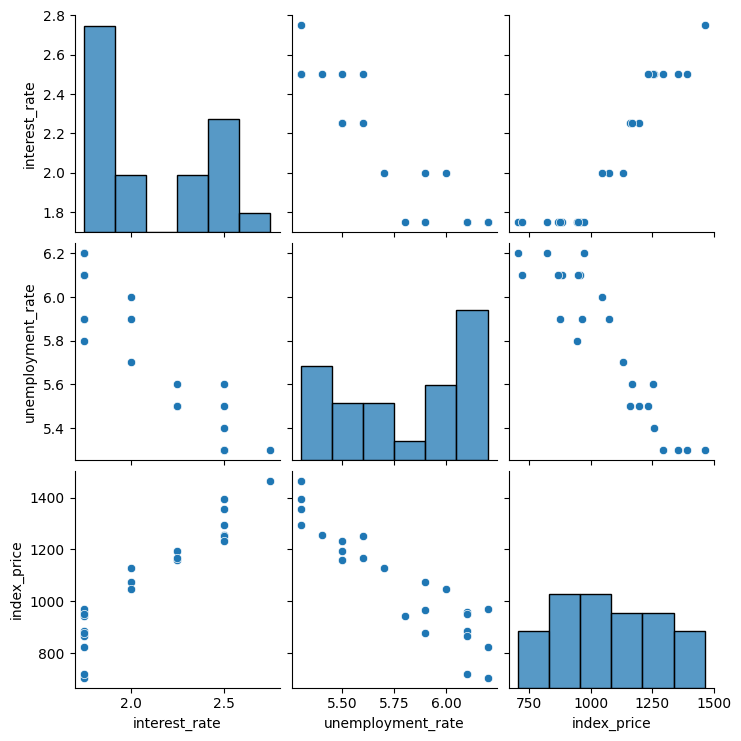

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [15]:
X = df.drop(columns="index_price")
y = df['index_price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
print("Training X Shape", X_train.shape)
print("Training y Shape", y_train.shape)
print("Testing X Shape", X_test.shape)
print("Testing y Shape", y_test.shape)

Training X Shape (19, 2)
Training y Shape (19,)
Testing X Shape (5, 2)
Testing y Shape (5,)


In [18]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [19]:
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [20]:
X_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [21]:
X_test

array([[ 0.40089186, -0.8660254 ],
       [-0.93541435,  1.15470054],
       [ 1.73719807, -1.44337567],
       [-0.93541435,  0.8660254 ],
       [-0.26726124,  0.28867513]])

In [22]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [23]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.model_selection import cross_val_score

In [30]:
#cross validation
cross_score = cross_val_score(lin_model, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [31]:
cross_score.mean()

np.float64(-5674.031667186767)

In [33]:
y_pred = lin_model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('Root Mean Squared Error: ', rmse)
print('R2 Score Error: ', r2)

Mean Squared Error:  5952.207497480517
Mean Absolute Error:  64.74722105636556
Root Mean Squared Error:  77.15055085662394
R2 Score Error:  0.8507000324705947


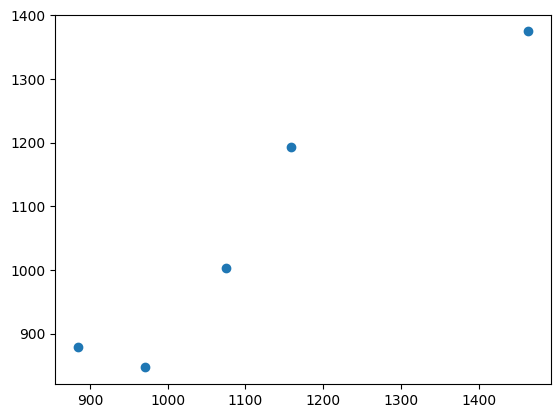

In [36]:
plt.scatter(y_test, y_pred)

In [37]:
residuals = y_test - y_pred
print(residuals)

8     -33.920684
16    124.309127
0      89.464440
18      4.386140
11     71.655715
Name: index_price, dtype: float64


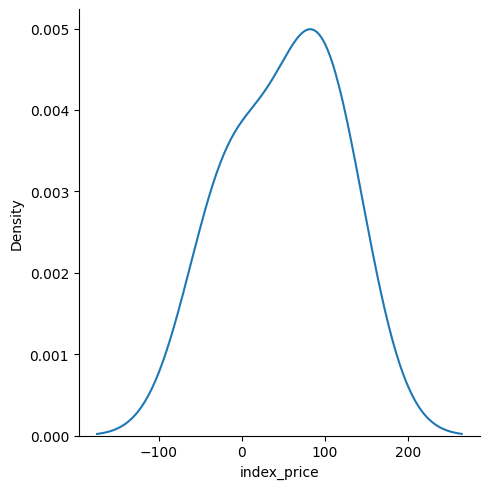

In [39]:
sns.displot(residuals, kind='kde')

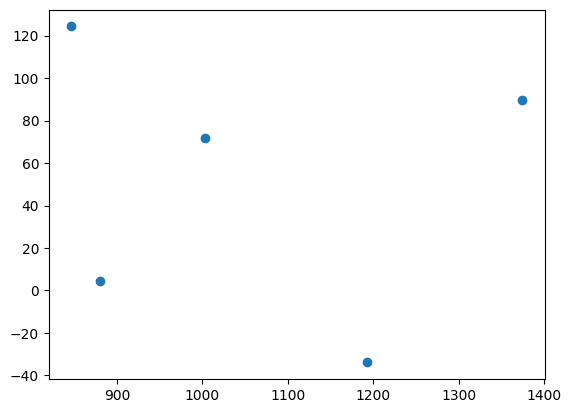

In [42]:
plt.scatter(y_pred, residuals)

In [43]:
import statsmodels.api as sm

In [46]:
model = sm.OLS(y_train, X_train).fit()

In [47]:
y_pred_ols = model.predict(X_test)

In [48]:
model.summary()

/Users/satviksawhney/Downloads/AIML/Krish Naik/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Sat, 25 Jan 2025   Prob (F-statistic):                       0.751
Time:                        06:13:03   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""